A notebook that explores the Whashingthon DC bikeshare rentals

In [26]:
# Data wrangling packages
import pandas as pd
import numpy as np

# ML packages
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

# Visualizations packages
import matplotlib.pylab as plt
import seaborn as sns


%matplotlib inline

# Exploring the data

In [3]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploring the `cnt` column (the target)

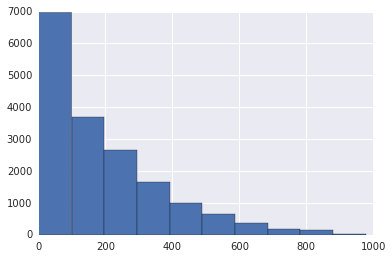

In [7]:
bike_rentals.cnt.hist()

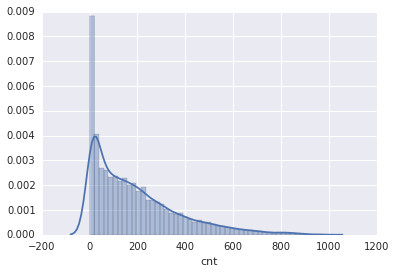

In [10]:
sns.distplot(bike_rentals['cnt'])

## Explore the data correlations

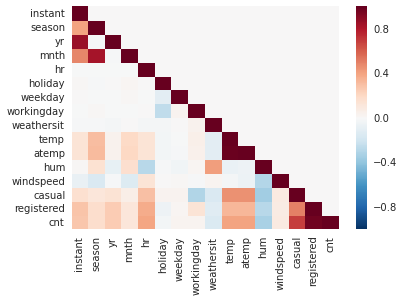

In [16]:
data = bike_rentals.corr()
df = pd.DataFrame(np.tril(data), index=data.index, 
                  columns=data.columns)
sns.heatmap(df)

# Feature engineering

## Create time related features

In [5]:
def assign_label(hour):
    hour_segments = {1: range(6,12), 
                     2: range(12, 18),
                    3: range(18, 24),
                    4: range(0,6)}
    for label, hours in hour_segments.items():
        if hour in hours:
            return int(label)

In [6]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(
    assign_label)

# Choosing the metric

Since this is a regression problem, the **RMSE** error seems a 
reasonable first choice. Another metric could be 
chosen later if better alternatives appear.

In [7]:
def rmse(pred, true):
    return np.sqrt(mean_squared_error(pred, true))

# Train/Test split

In [8]:
feature_columns = bike_rentals.columns.drop(['cnt', 'casual', 'registered',
                                             'dteday'])

In [10]:
features = bike_rentals[feature_columns]
target = bike_rentals['cnt']

In [11]:
f_train, f_test, t_train, t_test = train_test_split(features, 
                                                    target, 
                                                    train_size=0.8,
                                                   random_state=314)

# Try different models

## Linear model

In [18]:
linear_model = LinearRegression()
linear_model.fit(f_train, t_train)
rmse(linear_model.predict(f_test), t_test)

134.50592946052785

=> The linear model perfroms poorly since a lot of non-linearities
are involved in the decision of renting a bike. 

# Decision trees

In [23]:
decision_trees = DecisionTreeRegressor(random_state=314159265, 
                                       min_samples_leaf=3)
decision_trees.fit(f_train, t_train)
rmse(decision_trees.predict(f_test), t_test)

54.198566604028734

=> The decision trees model perfroms better compared to the linear model.
In fact, this model works well with non-linearities.

# Random forests

In [27]:
random_forests = RandomForestRegressor(random_state=314159265, 
                                       min_samples_leaf=3)
random_forests.fit(f_train, t_train)
rmse(random_forests.predict(f_test), t_test)

44.983179435408545

=> The random forests model perfroms even better compared to other ones 
(linear and decision trees).
In fact, this model works well with non-linearities and doesn't overfit 
a lot (contrary to the decision trees one which might overfit).